In [1]:
from PlotHelper import plot_image_grid
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from FeatureExtraction import get_hog_features, color_hist, bin_spatial, convert_to_colorspace
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
def plot_side_by_side(i1, t1, i2, t2, outfile):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(i1)
    ax1.set_title(t1, fontsize=30)
    ax2.imshow(i2)
    ax2.set_title(t2, fontsize=30)
    f.subplots_adjust(hspace=0)
    f.savefig(outfile, bbox_inches='tight')

def read_img(file):
    return cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)

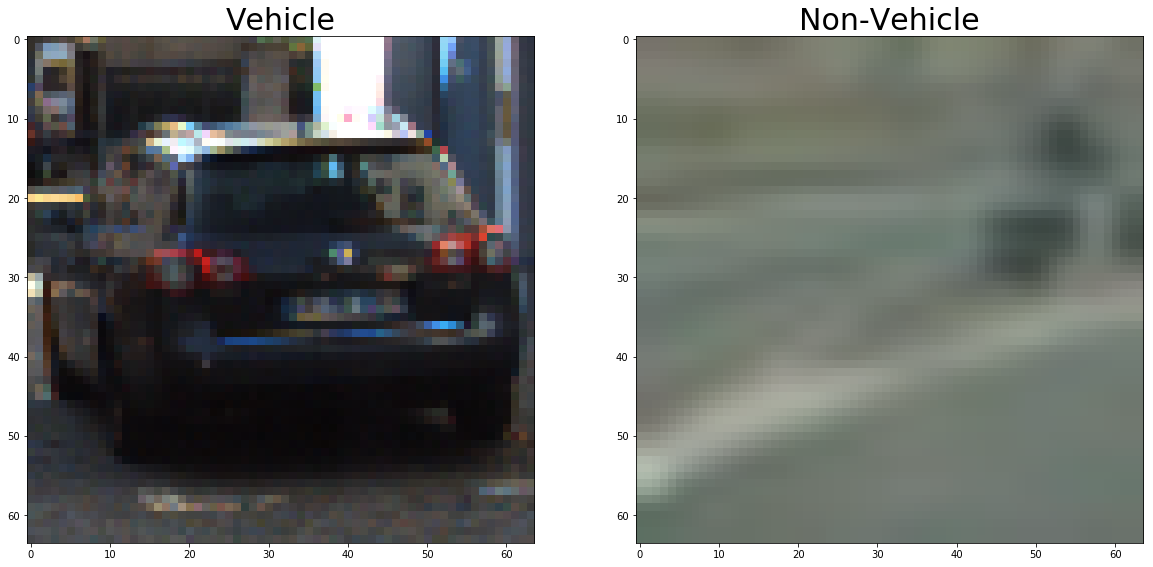

In [5]:
vehicle = read_img("./training_data/vehicles/KITTI_extracted/42.png")
nonvehicle = read_img("./training_data/non-vehicles/GTI/image42.png")
plot_side_by_side(vehicle, "Vehicle", nonvehicle, "Non-Vehicle", "vehicle_vs_nonvehicle.png")

In [46]:
random_vehicle_images = list(map(read_img, shuffle(glob.glob("training_data/vehicles/**/*.png", recursive=True))[0:4]))
random_nonvehicle_images = list(map(read_img, shuffle(glob.glob("training_data/non-vehicles/**/*.png", recursive=True))[0:4]))
to_ycrcb = lambda img: convert_to_colorspace(img, 'YCrCb')
rv_ycrcb = map(to_ycrcb, random_vehicle_images)
rnv_ycrcb = map(to_ycrcb, random_nonvehicle_images)

In [47]:
def to_hog_images(img):
    hog_features = []
    for channel in range(img.shape[2]):
        f, vis = get_hog_features(img[:,:,channel], 9, 8, 2, vis=True, feature_vec=True)
        hog_features.append(vis)
    return hog_features
rv_hog = list(map(to_hog_images, rv_ycrcb))
rnv_hog = list(map(to_hog_images, rnv_ycrcb))

In [48]:
vislist = [
    [random_vehicle_images[0], rv_hog[0][0], rv_hog[0][1], rv_hog[0][2]],
    [random_vehicle_images[1], rv_hog[1][0], rv_hog[1][1], rv_hog[1][2]],
    [random_vehicle_images[2], rv_hog[2][0], rv_hog[2][1], rv_hog[2][2]],
    [random_vehicle_images[3], rv_hog[3][0], rv_hog[3][1], rv_hog[3][2]],
]

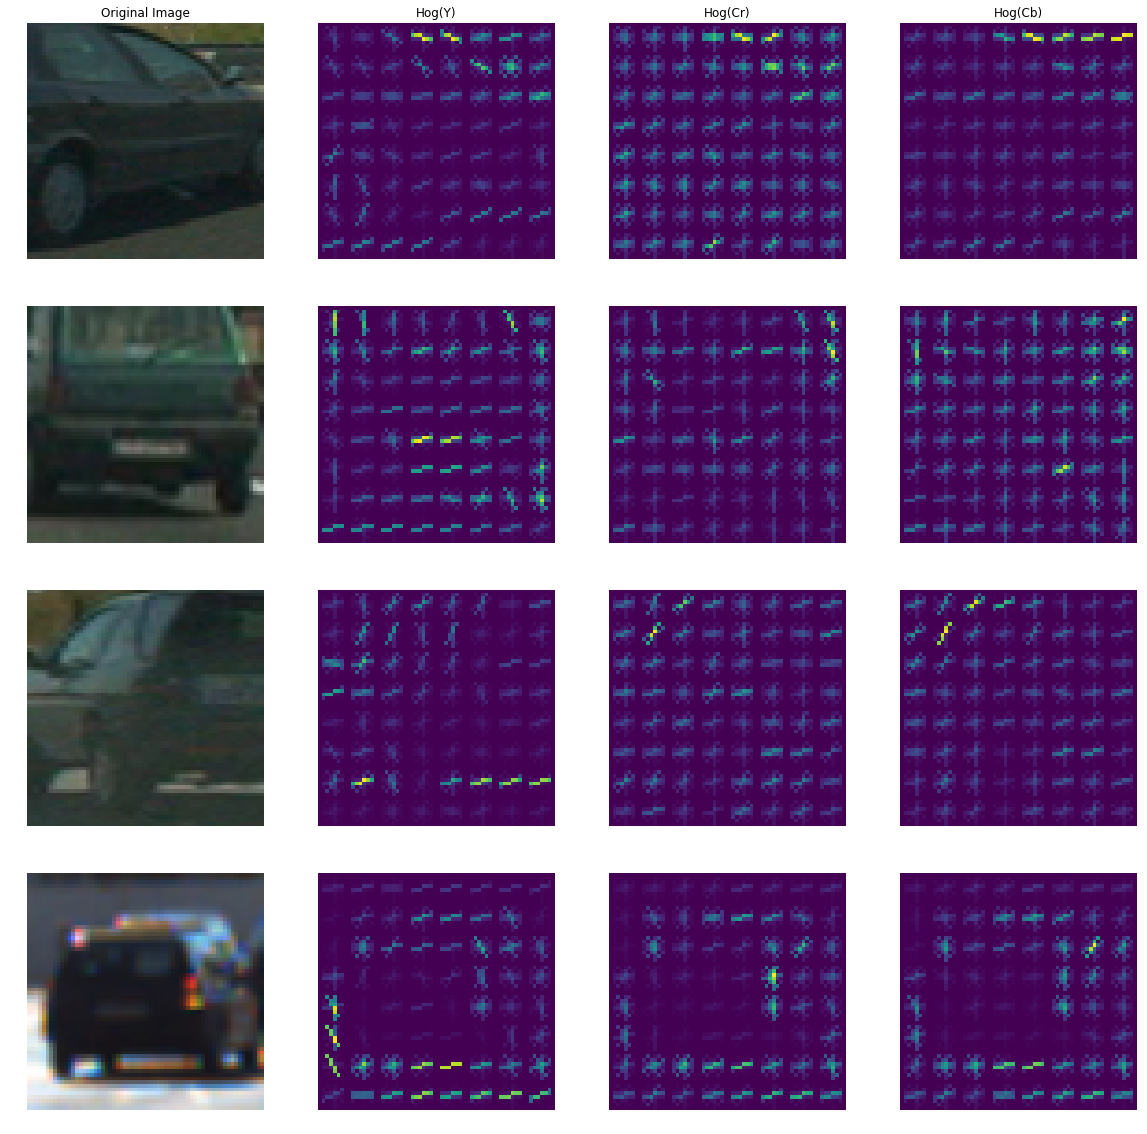

In [51]:
f = plot_image_grid(vislist, ["Original Image", "Hog(Y)", "Hog(Cr)", "Hog(Cb)"], figsize=(20,20))
plt.savefig("hog_YCrCb.png", bbox_inches='tight')

In [5]:
test_img = read_img("test_images/test4.jpg")
test_img2 = read_img("test_images/test5.jpg")


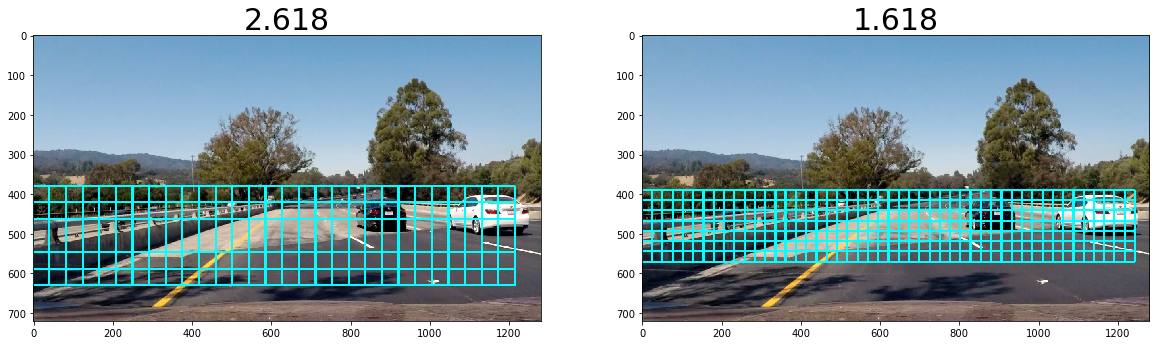

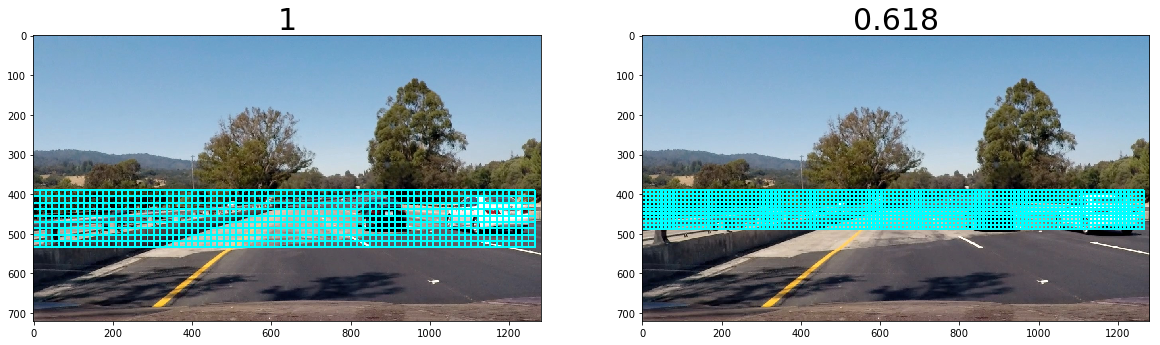

In [6]:
from VehicleTracking import VehicleTracking, draw_bounding_boxes
vt = VehicleTracking()
window_settings = [
    (380, 680, 2.618),
    (390, 620, 1.618),
    (390, 560, 1),
    (390, 500, 0.618),
]
float_image = convert_to_colorspace(test_img.astype(np.float32)/255, "YCrCb")
all_bounding_boxes = []
for ws in window_settings:
    _, bounding_boxes = vt.find_cars(float_image, ws[0], ws[1], ws[2])
    draw_img = test_img.copy()
    draw_bounding_boxes(draw_img, bounding_boxes, (0,255,255))
    all_bounding_boxes.append(draw_img)
plot_side_by_side(all_bounding_boxes[0], "2.618", all_bounding_boxes[1], "1.618", "sliding_windows1.png")
plot_side_by_side(all_bounding_boxes[2], "1", all_bounding_boxes[3], "0.618", "sliding_windows2.png")

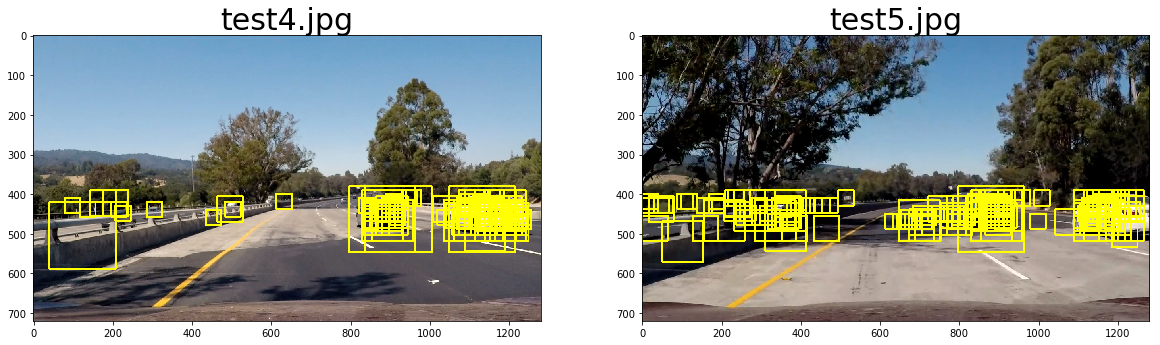

In [7]:
vt = VehicleTracking()
res = vt.process_image(test_img)
res2 = vt.process_image(test_img2)
plot_side_by_side(res, "test4.jpg", res2, "test5.jpg", "sliding_window_detections.png")